In [ ]:
import json                       # json 읽기
import pandas as pd               # 표로 만들기
import matplotlib.pyplot as plt   # 그래프 그리기
import numpy as np                # 수학

In [ ]:
with open("CH.json", "r", encoding="utf8") as f:  # 파일 열기
  contents = f.read()                               # string type
  json_data = json.loads(contents)                  # dataframe으로 저장

# json_data 출력
print(json_data)

# 전체 데이터를 넣을 리스트
list_data1 = []                                     # white day
list_data2 = []                                     # test
list_data3 = []                                     # white day 최종 가공

{'bpm': ['90', '90', '90', '90', '90', '90', '90', '90', '89', '89', '89', '89', '89', '88', '88', '88', '88', '88', '87', '87', '87', '87', '87', '88', '88', '88', '88', '88', '88', '89', '89', '89', '89', '89', '90', '90', '90', '90', '90', '89', '89', '89', '89', '89', '88', '88', '88', '88', '88', '88', '87', '87', '87', '87', '87', '88', '88', '88', '88', '88', '88', '88', '88', '88', '88', '89', '89', '89', '89', '89', '89', '88', '88', '88', '88', '88', '87', '87', '87', '87', '87', '88', '88', '88', '88', '88', '89', '89', '89', '89', '89', '89', '88', '88', '88', '88', '88', '89', '89', '89', '89', '89', '88', '88', '88', '88', '88', '87', '87', '87', '87', '87', '87', '86', '86', '86', '86', '86', '85', '85', '85', '85', '85', '84', '84', '84', '84', '84', '83', '83', '83', '83', '83', '83', '84', '84', '84', '84', '84', '85', '85', '85', '85', '85', '86', '86', '86', '86', '86', '89', '89', '92', '95', '94', '92', '88', '86', '86', '86', '86', '85', '85', '85', '85', '85', '

Test

In [ ]:
# json_data에 저장된 bpm data를 json_data2에 저장
json_data2 = json_data['bpm']

# json_data2의 값을 불러옴
for value in json_data2:
  # list_data2에 list 형식으로 데이터 넣기
  # 그래프로 그리기 위해 BPM을 Float로 형변환
  list_data2.append([float(value)])

In [ ]:
# 표로 만들기(열 이름 : Date, Time, BPM)
df_data2 = pd.DataFrame(list_data2, columns = ['BPM'])

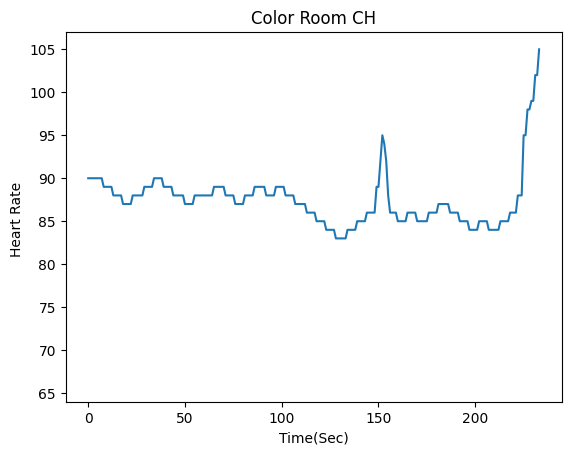

In [ ]:
# 그래프 그리기

#plt.figure(figsize = (20, 10))    # 그래프 크기
plt.plot(df_data2['BPM'])         # x축 : Time, y축 : BPM
#plt.xticks(np.arange(0, len(df_data2.index) + 1, 5))  # x축 간격 5초로 지정
plt.ylim([64, 107])     # Y축의 범위: [ymin, ymax]

plt.title('Color Room CH')                 # 그래프 제목
plt.xlabel('Time(Sec)')                    # x축 라벨
plt.ylabel('Heart Rate ')                  # y축 라벨

plt.show()

White day

In [ ]:
# json_data에 저장된 test_bpm의 key, value를 json_data1에 저장
json_data1 = json_data["test_bpm"]

# 이전 BPM 값을 저장할 변수
prev_bpm = None

# json_data1의 value값만 불러옴
for value in json_data1.values():
  # value를 공백을 기준으로 나눔
  tempValue = value.split(' ')
  current_bpm = tempValue[0]
  # BPM이 0.0일 경우 이전 데이터 저장
  if (current_bpm == "0.0"):
    if (prev_bpm is None):
      # 첫 값이 0.0일 경우, 사용할 값이 없어 건너뛰기
      continue
    bpm = prev_bpm
    else:
    # BPM 값 저장
      bpm = current_bpm
      prev_bpm = current_bpm
    # value를 'T'를 기준으로 나눔
    tempValue = tempValue[1].split('T')
    # Date, Time 값 저장
    date = tempValue[0]
    time = tempValue[1]
    # 출력
    # print("date:",  date, "| time:", time, "| bpm:", bpm)

    # list_data에 list 형식으로 데이터 넣기
    # 그래프로 그리기 위해 BPM은 Float로 형변환
    list_data1.append([date, time, float(bpm)])

In [ ]:
# 표로 만들기(열 이름 : Date, Time, BPM)
df_data1 = pd.DataFrame(list_data1, columns = ["Date", "Time", "BPM"])
# index를 0~n에서 Time으로 변경
df_data1 = df_data1.set_index('Time')
# 표 확인
df_data1

,Date,Time,BPM
0,2023-05-03,17:17:22.275,100.0
1,2023-05-03,17:17:25.337,101.0
2,2023-05-03,17:17:27.214,104.0
3,2023-05-03,17:17:29.183,102.0
4,2023-05-03,17:17:35.275,102.0
...,...,...,...
1028,2023-05-03,18:01:43.070,90.0
1029,2023-05-03,18:01:44.073,92.0
1030,2023-05-03,18:01:45.073,91.0
1031,2023-05-03,18:01:46.086,92.0


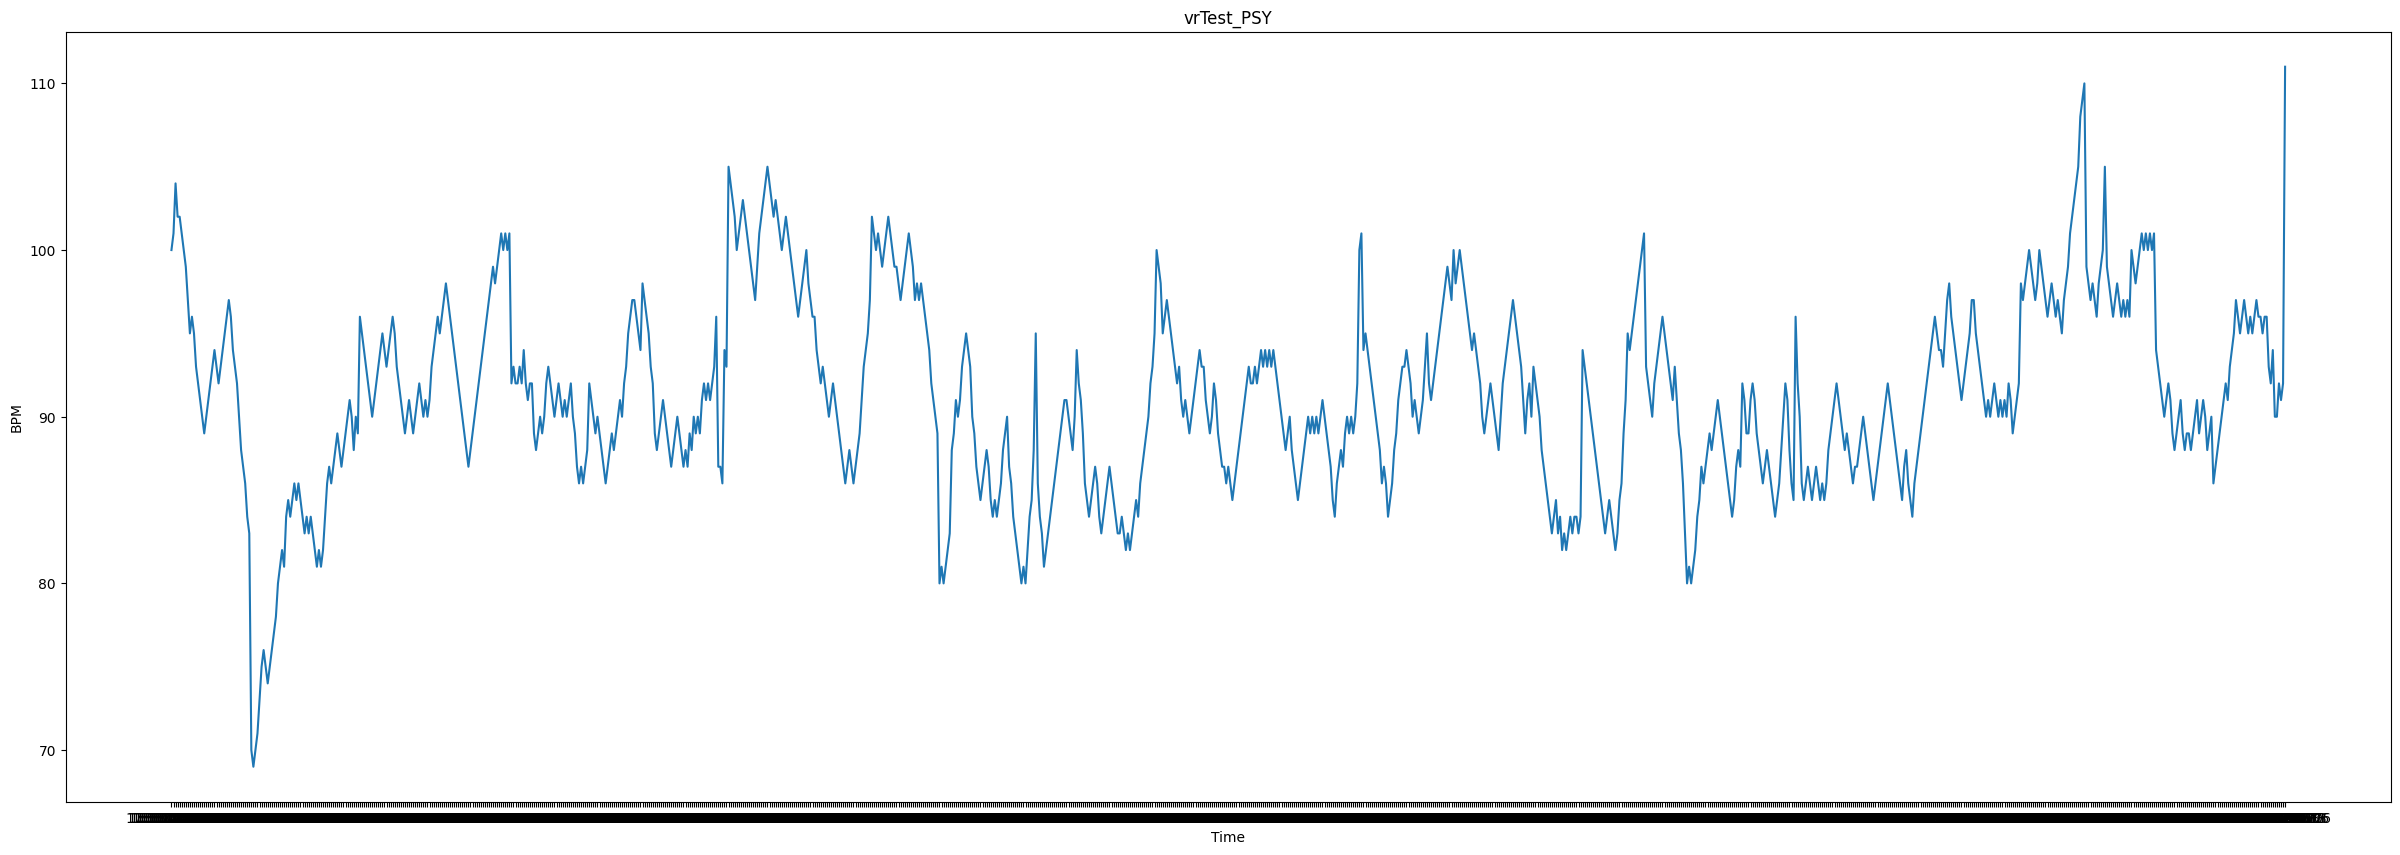

In [ ]:
# 그래프 그리기

plt.figure(figsize = (30, 10))    # 그래프 크기
plt.plot(df_data1['BPM'])          # x축 : Time, y축 : BPM
plt.title('vrTest_PSY')           # 그래프 제목
plt.xlabel('Time')                # x축 라벨
plt.ylabel('BPM')                 # y축 라벨

plt.show()

White day 최종 가공

In [ ]:
# json_data에 저장된 test_bpm의 key, value를 json_data1에 저장
json_data3 = json_data["test_bpm"]

time = '0'

# json_data1의 value값만 불러옴
for value in json_data3.values():
  # value를 공백을 기준으로 나눔
  tempValue = value.split(' ')
  # BPM이 0.0이 아닌 데이터만 저장
  if (tempValue[0] != '0.0'):
    # BPM 값 소수점 없이 저장
    tempBPM = tempValue[0].split('.')
    bpm = tempBPM[0]
    # value를 'T'를 기준으로 나눔
    tempValue = tempValue[1].split(':')
    # Time 값 저장
    if (time != tempValue[1]):
      time = tempValue[1]
      list_data3.append([time, float(bpm)])

In [ ]:
# 표로 만들기(열 이름 : Date, Time, BPM)
df_data3 = pd.DataFrame(list_data3, columns = ['Time', 'BPM'])
# index를 0~n에서 Time으로 변경
df_data3 = df_data3.set_index('Time')
# 표 확인
df_data3

,BPM
Time,
17,100.0
18,92.0
19,84.0
20,96.0
21,89.0
22,88.0
23,92.0
24,92.0
25,90.0


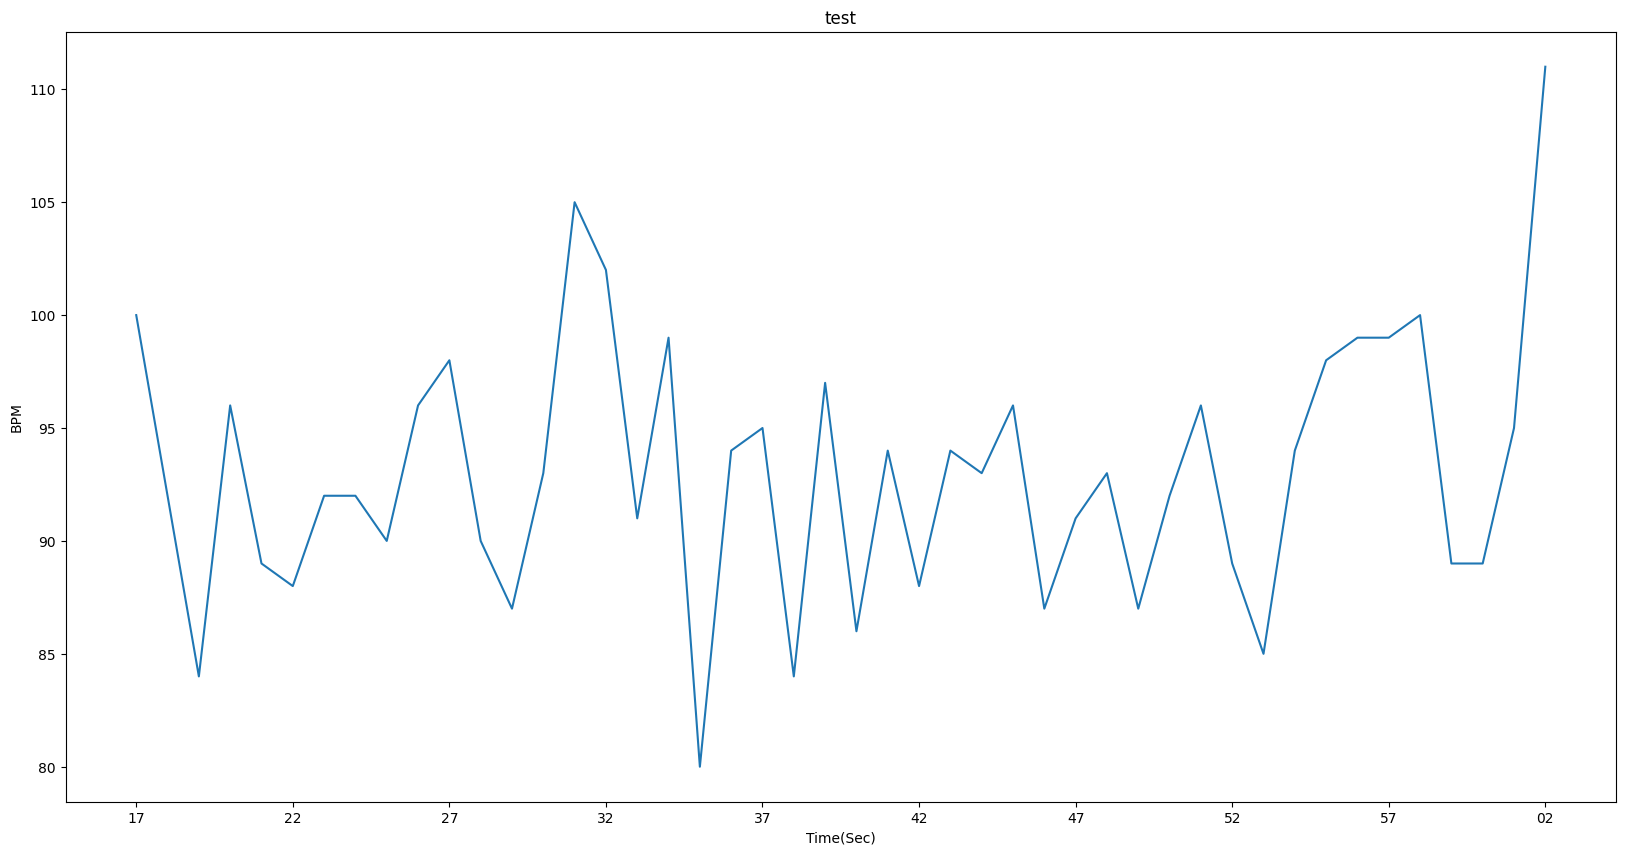

In [ ]:
# 그래프 그리기
plt.figure(figsize = (20, 10))                        # 그래프 크기
plt.plot(df_data3['BPM'])                             # x축 : Time, y축 : BPM
plt.xticks(np.arange(0, len(df_data3.index) + 1, 5))  # x축 간격 5초로 지정

plt.title('test')                                     # 그래프 제목
plt.xlabel('Time(Sec)')                               # x축 라벨
plt.ylabel('BPM')                                     # y축 라벨

plt.show()